In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df= pd.read_excel("data.xlsx")

In [6]:
df.head()
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df.duplicated().sum()

5268

In [12]:
df=df.dropna(subset=['CustomerID'])

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df=df.dropna(subset=['Description'])

In [15]:
df=df.drop_duplicates(keep='last')

In [16]:
df.duplicated().sum()

0

In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
# Extract date features
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

In [21]:
# Remove negative or zero values
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,InvoiceYear,InvoiceMonth,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,1,Tuesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,Tuesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,1,Tuesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,Tuesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,Tuesday,8


In [22]:
# Remove negative or zero values
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,InvoiceYear,InvoiceMonth,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,1,Tuesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,Tuesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,1,Tuesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,Tuesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,1,Tuesday,8


In [23]:
df['Country'].value_counts().head()

Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Name: count, dtype: int64

In [24]:
df['Quantity'].median()

6.0

In [25]:
df['UnitPrice'].mean()

3.125913907082396

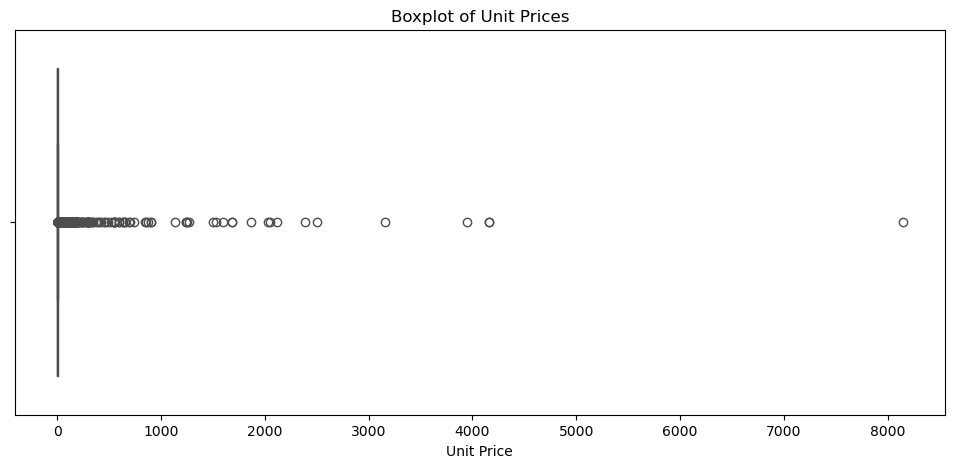

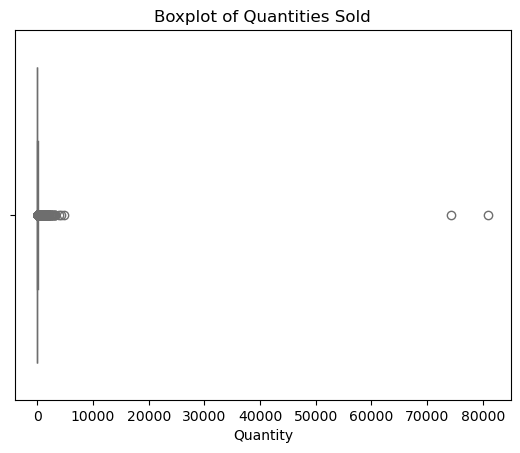

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))

# Boxplot for UnitPrice
sns.boxplot(x=df['UnitPrice'], color='orange')
plt.title('Boxplot of Unit Prices')
plt.xlabel('Unit Price')
plt.show()

# Boxplot for Quantity
sns.boxplot(x=df['Quantity'], color='lightcoral')
plt.title('Boxplot of Quantities Sold')
plt.xlabel('Quantity')
plt.show()


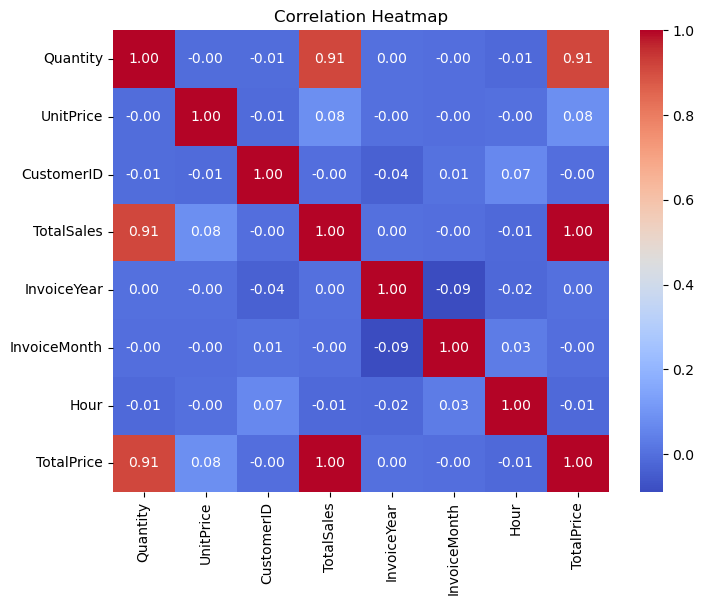

In [27]:
# Create total price column first
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [3]:
from scipy import stats 
from scipy import stats
import numpy as np

# Example variable
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
sample = df['TotalPrice']

# Perform one-sample t-test
t_stat, p_val_two_tailed = stats.ttest_1samp(sample, popmean=50)

# Convert to one-tailed p-value (right tail)
p_val_one_tailed = p_val_two_tailed / 2 if t_stat > 0 else 1 - (p_val_two_tailed / 2)

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_val_one_tailed)


NameError: name 'df' is not defined

In [ ]:

# Separate samples by country
uk = df[df['Country'] == 'United Kingdom']['TotalPrice']
fr = df[df['Country'] == 'France']['TotalPrice']

# Perform independent two-sample t-test
t_stat, p_val = stats.ttest_ind(uk, fr, equal_var=False)  # Welch's t-test

print("T-statistic:", t_stat)
print("Two-tailed p-value:", p_val)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
X = df[['Quantity', 'UnitPrice']]
y = df['TotalPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R^2 score:", model.score(X_test, y_test))
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example: predicting number of items sold (Quantity)
poisson_model = smf.glm(formula='Quantity ~ UnitPrice + Month', 
                        data=df, family=sm.families.Poisson()).fit()
print(poisson_model.summary())